In [9]:
!conda install seaborn

^C


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth

# a.

In [3]:
df = pd.read_csv('datasets/diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# b.

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

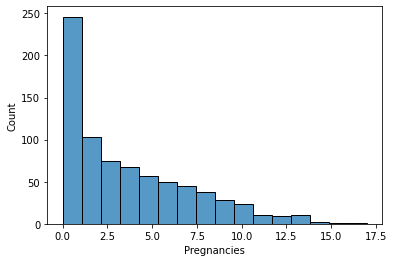

In [8]:
sns.histplot(data=df, x='Pregnancies')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

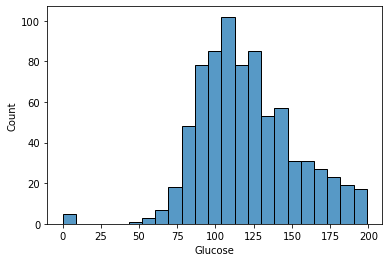

In [9]:
sns.histplot(data=df, x='Glucose')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

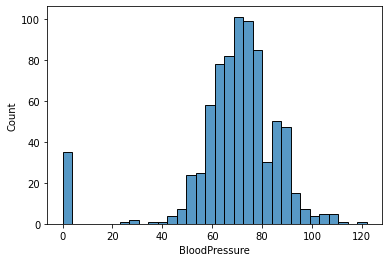

In [10]:
sns.histplot(data=df, x='BloodPressure')

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

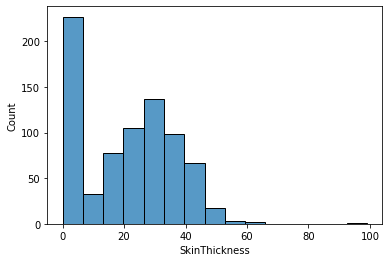

In [11]:
sns.histplot(data=df, x='SkinThickness')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

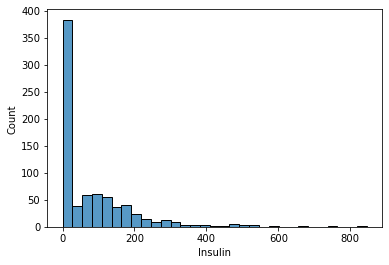

In [12]:
sns.histplot(data=df, x='Insulin')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

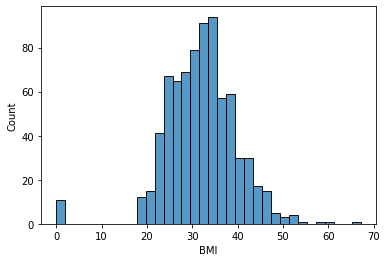

In [13]:
sns.histplot(data=df, x='BMI')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

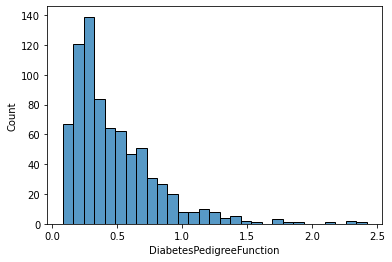

In [14]:
sns.histplot(data=df, x='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Age', ylabel='Count'>

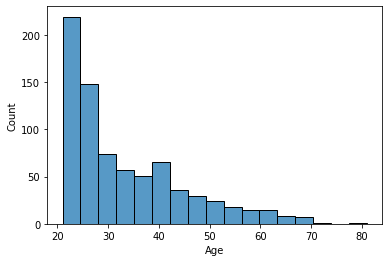

In [15]:
sns.histplot(data=df, x='Age')

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

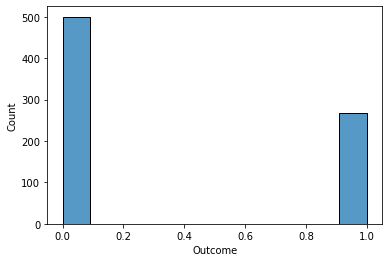

In [16]:
sns.histplot(data=df, x='Outcome')

# c.

In [17]:
df['Age'] = pd.qcut(df['Age'], q=3, labels=["low", "medium", "high"])

In [18]:
df['BMI'] = pd.qcut(df['BMI'], q=5, labels=["a", "b", "c", "d", "e"])

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,c,0.627,high,1
1,1,85,66,29,0,b,0.351,medium,0
2,8,183,64,0,0,a,0.672,medium,1
3,1,89,66,23,94,b,0.167,low,0
4,0,137,40,35,168,e,2.288,medium,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,c,0.171,high,0
764,2,122,70,27,0,d,0.340,medium,0
765,5,121,72,23,112,b,0.245,medium,0
766,1,126,60,0,0,b,0.349,high,1


# d.

In [20]:
df_new = pd.DataFrame()

In [22]:
df = pd.get_dummies(df, columns=['Age'])

In [23]:
df = pd.get_dummies(df, columns=['BMI'])

In [24]:
df = pd.get_dummies(df, columns=['Outcome'])

In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age_low,Age_medium,Age_high,BMI_a,BMI_b,BMI_c,BMI_d,BMI_e,Outcome_0,Outcome_1
0,6,148,72,35,0,0.627,0,0,1,0,0,1,0,0,0,1
1,1,85,66,29,0,0.351,0,1,0,0,1,0,0,0,1,0
2,8,183,64,0,0,0.672,0,1,0,1,0,0,0,0,0,1
3,1,89,66,23,94,0.167,1,0,0,0,1,0,0,0,1,0
4,0,137,40,35,168,2.288,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,0,0,1,0,0,1,0,0,1,0
764,2,122,70,27,0,0.340,0,1,0,0,0,0,1,0,1,0
765,5,121,72,23,112,0.245,0,1,0,0,1,0,0,0,1,0
766,1,126,60,0,0,0.349,0,0,1,0,1,0,0,0,0,1


# e.

In [38]:
frequent_itemset1 = apriori(df.iloc[:,6:],  min_support=0.01, use_colnames=True)

C:\Users\ACER\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
frequent_itemset1

,support,itemsets
0,0.347656,(Age_low)
1,0.321615,(Age_medium)
2,0.330729,(Age_high)
3,0.201823,(BMI_a)
4,0.204427,(BMI_b)
...,...,...
63,0.037760,"(BMI_c, Outcome_1, Age_high)"
64,0.031250,"(Age_high, BMI_d, Outcome_0)"
65,0.046875,"(Outcome_1, Age_high, BMI_d)"
66,0.026042,"(BMI_e, Age_high, Outcome_0)"


# f.

In [40]:
frequent_itemset2 = fpgrowth(df.iloc[:,6:], min_support=0.01, use_colnames=True)

C:\Users\ACER\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [41]:
frequent_itemset2

,support,itemsets
0,0.348958,(Outcome_1)
1,0.330729,(Age_high)
2,0.196615,(BMI_c)
3,0.651042,(Outcome_0)
4,0.321615,(Age_medium)
...,...,...
63,0.023438,"(Outcome_1, BMI_d, Age_medium)"
64,0.031250,"(Age_high, BMI_d, Outcome_0)"
65,0.046875,"(Outcome_1, Age_high, BMI_d)"
66,0.040365,"(Age_low, BMI_d, Outcome_0)"


# g.

In [43]:
rules1 = association_rules(frequent_itemset1, metric="confidence", min_threshold=0.5)

In [44]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_low),(Outcome_0),0.347656,0.651042,0.289062,0.831461,1.277124,0.062724,2.070486
1,(Age_medium),(Outcome_0),0.321615,0.651042,0.196615,0.611336,0.939012,-0.012770,0.897841
2,(Age_high),(Outcome_0),0.330729,0.651042,0.165365,0.500000,0.768000,-0.049954,0.697917
3,(Age_high),(Outcome_1),0.330729,0.348958,0.165365,0.500000,1.432836,0.049954,1.302083
4,(BMI_a),(Outcome_0),0.201823,0.651042,0.183594,0.909677,1.397265,0.052199,3.863467
5,(BMI_b),(Outcome_0),0.204427,0.651042,0.149740,0.732484,1.125096,0.016649,1.304439
6,(BMI_c),(Outcome_0),0.196615,0.651042,0.108073,0.549669,0.844291,-0.019931,0.774893
7,(BMI_d),(Outcome_0),0.199219,0.651042,0.113281,0.568627,0.873412,-0.016418,0.808949
8,(BMI_e),(Outcome_1),0.197917,0.348958,0.101562,0.513158,1.470542,0.032498,1.337275
9,"(Age_low, BMI_a)",(Outcome_0),0.100260,0.651042,0.097656,0.974026,1.496104,0.032383,13.434896


In [45]:
rules2 = association_rules(frequent_itemset2, metric="confidence", min_threshold=0.5)

In [46]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_high),(Outcome_1),0.330729,0.348958,0.165365,0.500000,1.432836,0.049954,1.302083
1,(Age_high),(Outcome_0),0.330729,0.651042,0.165365,0.500000,0.768000,-0.049954,0.697917
2,(BMI_c),(Outcome_0),0.196615,0.651042,0.108073,0.549669,0.844291,-0.019931,0.774893
3,"(BMI_c, Age_high)",(Outcome_1),0.074219,0.348958,0.037760,0.508772,1.457973,0.011861,1.325335
4,"(BMI_c, Age_medium)",(Outcome_1),0.058594,0.348958,0.035156,0.600000,1.719403,0.014709,1.627604
5,"(BMI_c, Age_low)",(Outcome_0),0.063802,0.651042,0.048177,0.755102,1.159837,0.006639,1.424913
6,(Age_medium),(Outcome_0),0.321615,0.651042,0.196615,0.611336,0.939012,-0.012770,0.897841
7,(BMI_b),(Outcome_0),0.204427,0.651042,0.149740,0.732484,1.125096,0.016649,1.304439
8,"(Age_medium, BMI_b)",(Outcome_0),0.070312,0.651042,0.044271,0.629630,0.967111,-0.001506,0.942188
9,"(Age_low, BMI_b)",(Outcome_0),0.072917,0.651042,0.070312,0.964286,1.481143,0.022841,9.770833


<div style="direction:rtl">

Apriori الگوهای مکرر را با ساخت مجموعه آیتم ها با استفاده از جفت سازی مانند مجموعه آیتم های تک، مجموعه دوگانه، مجموعه آیتم های سه گانه تولید می کند.

FP Growth یک FP-Tree برای ایجاد الگوهای مکرر ایجاد می کند.


Apriori از تولید نامزد استفاده می کند که در آن زیر مجموعه های مکرر یک آیتم در یک زمان گسترش می یابد.

FP-growth FP-Tree شرطی را برای هر آیتم در داده ایجاد می کند.


از آنجایی که apriori پایگاه داده را در هر یک از مراحل خود اسکن می‌کند، برای داده‌هایی که تعداد آیتم‌ها بیشتر است، زمان‌بر می‌شود.

FP-tree در مراحل ابتدایی خود تنها به یک اسکن از پایگاه داده نیاز دارد بنابراین زمان کمتری مصرف می کند.


در Apriori یک نسخه تبدیل شده از پایگاه داده در حافظه ذخیره می شود

  در FP-growth مجموعه درخت FP شرطی برای هر آیتم در حافظه ذخیره می شود


Apriori از جستجوی وسعت اول استفاده می کند

FP-growth از یک جستجوی عمقی استفاده می کند.

</div>